Coastal Erosion Simulation and Optimization
This script demonstrates how to use the coastal erosion simulation system.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coastal_simulation import CoastalSimulation
from optimization import OptimizationManager

In [2]:
def visualize_layers(state):
    """
    Visualize individual layers of the simulation state
    """
    titles = ['Ground Layer', 'Sand Layer', 'Water Layer']
    
    # Create a figure with 4 subplots (composite + 3 layers)
    plt.figure(figsize=(20, 5))
    
    # Plot composite image
    plt.subplot(1, 4, 1)
    plt.imshow(state)
    plt.title('Composite View')
    plt.colorbar()
    
    # Plot individual layers
    for i in range(3):
        plt.subplot(1, 4, i + 2)
        plt.imshow(state[:,:,i])
        plt.title(titles[i])
        plt.colorbar()
    
    plt.tight_layout()
    plt.show()

In [3]:
def run_basic_simulation():
    """
    Initialize and run a basic simulation with default parameters
    """
    print("Running basic simulation...")
    
    # Create simulation instance
    sim = CoastalSimulation()
    
    # Run a basic simulation
    final_state, total_sand = sim.run_sim(
        num_timesteps=100,
        wave_freq=20,
        wave_speed=1,
        wave_decay=0.6,
        wave_cutoff=0.1,
        wave_retreat_coeff=0.8,
        wave_height=2,
        sand_pull=0.2,
        ground_pull=0.1,
        water_decay=0.99,
        plots=False
    )

    # Display results with layer visualization
    visualize_layers(final_state)
    
    print(f"Basic simulation completed. Total sand: {total_sand}")
    return sim

In [4]:
def run_optimization(sim):
    """
    Run the optimization process using the provided simulation
    """
    print("\nStarting optimization process...")
    
    # Initialize optimization
    opt_manager = OptimizationManager()
    
    # Sample initial parameters
    n_samples = 10
    param_samples = opt_manager.sample_parameters(n_samples)
    
    # Run initial simulations
    print(f"Running {n_samples} initial simulations...")
    outcomes = []
    for i, params in enumerate(param_samples):
        print(f"Running simulation {i+1}/{n_samples}")
        _, outcome = sim.run_sim(
            num_timesteps=100,
            wave_freq=params[0],
            wave_speed=params[1],
            wave_decay=params[2],
            wave_cutoff=params[3],
            wave_retreat_coeff=params[4],
            wave_height=params[5],
            sand_pull=params[6],
            ground_pull=params[7],
            water_decay=params[8]
        )
        outcomes.append(outcome)
    
    # Convert to numpy arrays
    X = np.array(param_samples)
    Y = np.array(outcomes).reshape(-1, 1)
    
    # Run sensitivity analysis
    print("\nRunning sensitivity analysis...")
    main_effects, total_effects = opt_manager.run_sensitivity_analysis(X, Y)
    print("Main effects:", main_effects)
    print("Total effects:", total_effects)
    
    # Run optimization
    print("\nRunning Bayesian optimization...")
    loop_state = opt_manager.run_optimization(X, Y)
    
    # Get and print best results
    best_parameters = loop_state.X[-1]  # Access X directly from loop_state
    best_outcome = loop_state.Y[-1]     # Access Y directly from loop_state
    
    print("\nOptimization Results:")
    param_names = list(opt_manager.parameter_space.parameter_names)
    for name, value in zip(param_names, best_parameters):
        print(f"{name}: {value:.4f}")
    print(f"Best outcome: {best_outcome[0]:.4f}")
    
    # Run simulation with best parameters
    print("\nRunning simulation with best parameters...")
    final_state, final_sand = sim.run_sim(
        num_timesteps=100,
        wave_freq=best_parameters[0],
        wave_speed=best_parameters[1],
        wave_decay=best_parameters[2],
        wave_cutoff=best_parameters[3],
        wave_retreat_coeff=best_parameters[4],
        wave_height=best_parameters[5],
        sand_pull=best_parameters[6],
        ground_pull=best_parameters[7],
        water_decay=best_parameters[8],
        plots=False
    )
    
    # Display final results with layer visualization
    visualize_layers(final_state)
    
    return loop_state

Running basic simulation...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-44..197].


Total sand: 288545


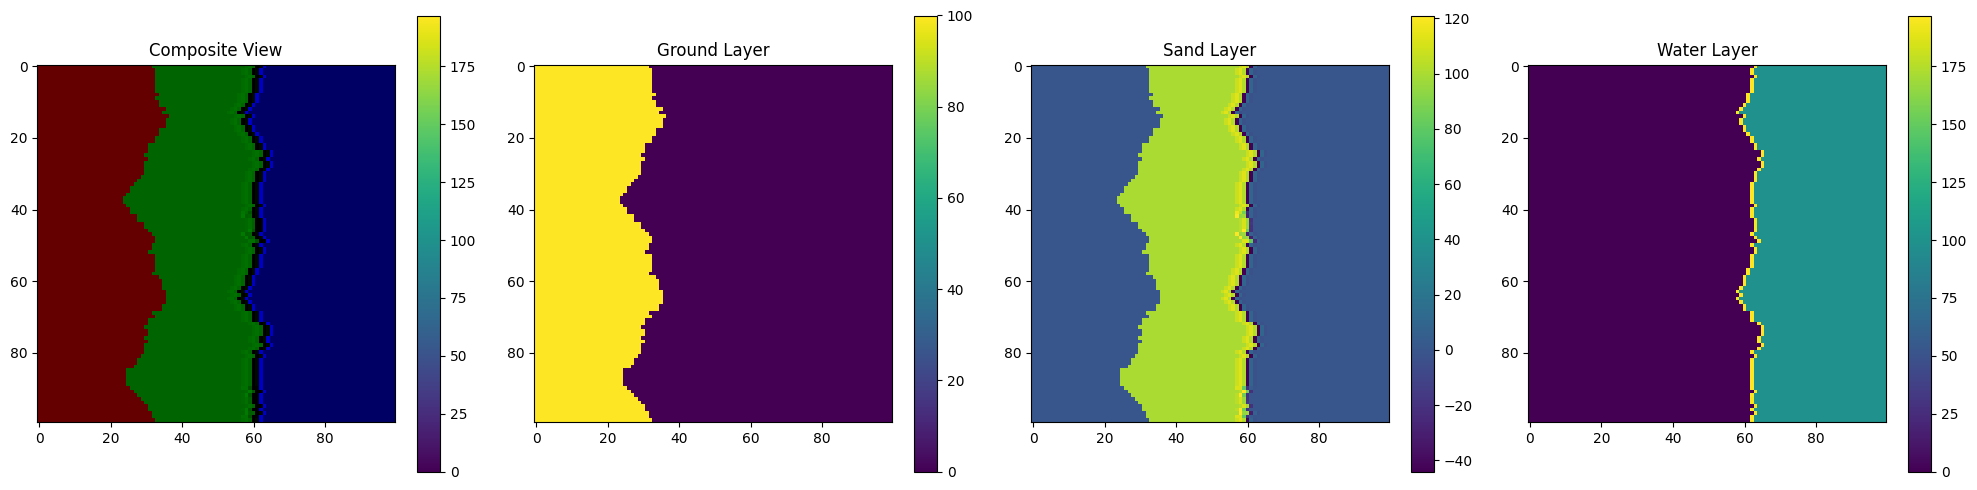

Basic simulation completed. Total sand: 288545

Starting optimization process...
Running 10 initial simulations...
Running simulation 1/10
Total sand: 289249
Running simulation 2/10
Total sand: 289599
Running simulation 3/10
Total sand: 289800
Running simulation 4/10
Total sand: 287497
Running simulation 5/10
Total sand: 289174
Running simulation 6/10
Total sand: 254619
Running simulation 7/10
Total sand: 280972
Running simulation 8/10
Total sand: 282220
Running simulation 9/10
Total sand: 289273
Running simulation 10/10
Total sand: 285614

Running sensitivity analysis...
Main effects: {'wave_freq': array([0.68841408]), 'wave_speed': array([0.0081134]), 'wave_decay': array([0.00342482]), 'wave_cutoff': array([0.00328871]), 'wave_retreat_coeff': array([0.00292413]), 'wave_height': array([0.02072649]), 'sand_pull': array([0.00333839]), 'ground_pull': array([0.00327695]), 'water_decay': array([0.00328507])}
Total effects: {'wave_freq': array([0.97471451]), 'wave_speed': array([0.04065524]

 c:\Users\sonia\anaconda3\envs\new_env\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


Total sand: 386689
Total sand: 359589
Total sand: 389346
Total sand: 233724
Total sand: 374452
Total sand: 389183
Total sand: 386468
Total sand: 375651
Total sand: 389399
Total sand: 389400
Total sand: 380806
Total sand: 389286
Total sand: 389106
Total sand: 384214
Total sand: 379905
Total sand: 375411


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


Total sand: 389129
Total sand: 388331
Total sand: 387243

Optimization Results:
wave_freq: 49.9872
wave_speed: 0.6701
wave_decay: 0.8581
wave_cutoff: 0.1846
wave_retreat_coeff: 0.7994
wave_height: 1.5211
sand_pull: 0.4789
ground_pull: 0.1694
water_decay: 0.9744
Best outcome: -387243.0000

Running simulation with best parameters...


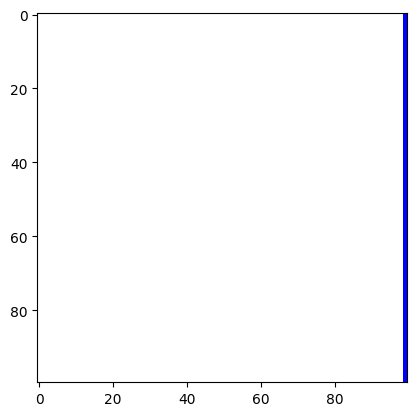

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


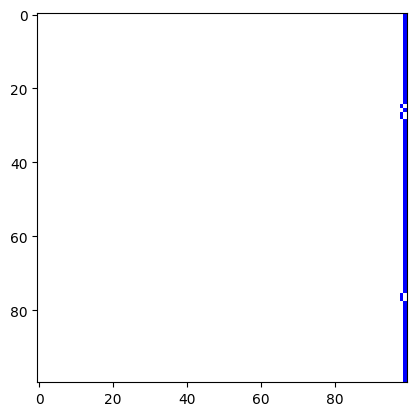

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


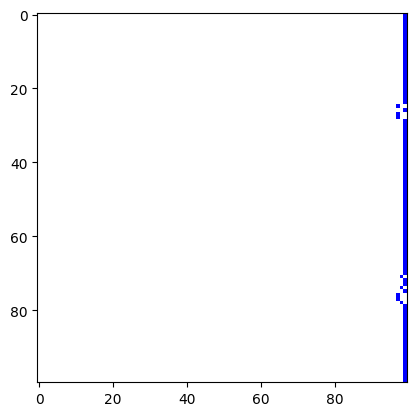

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


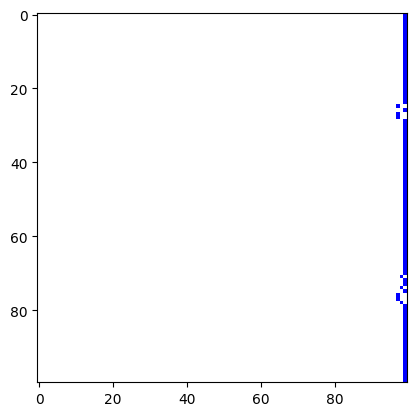

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


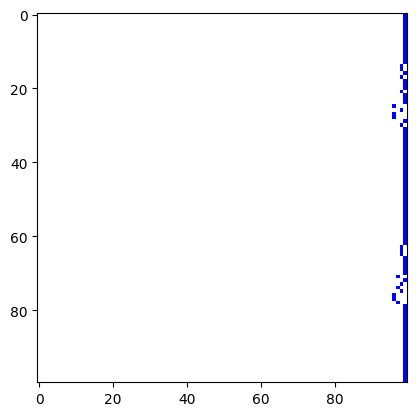

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


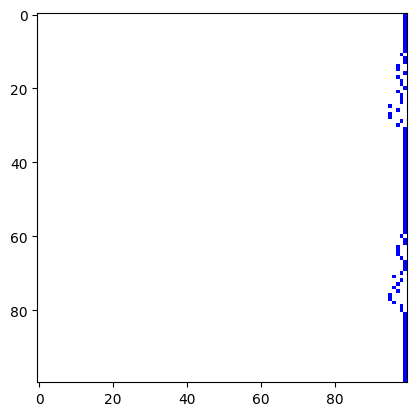

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


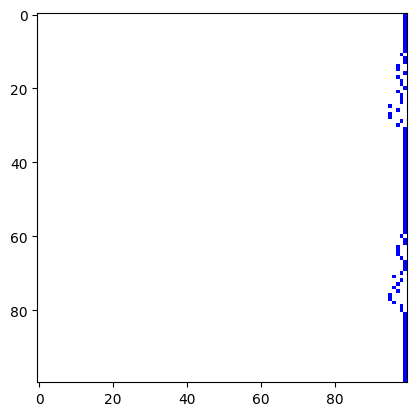

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


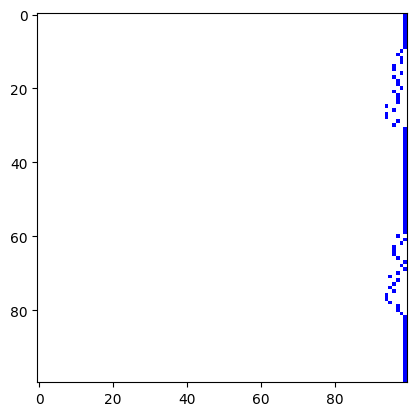

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


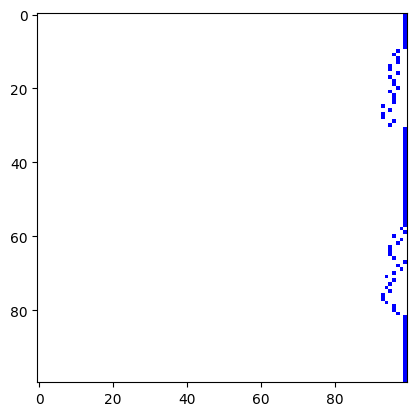

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


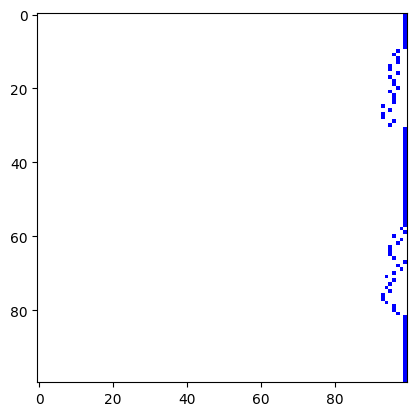

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


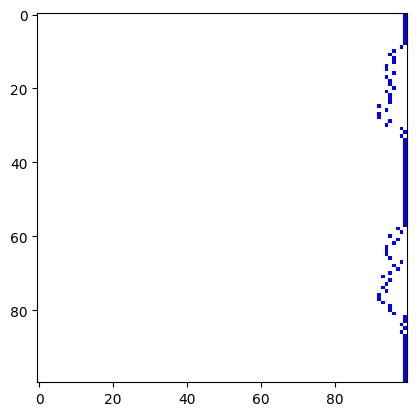

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


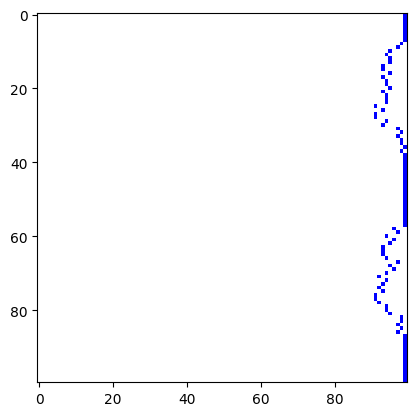

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


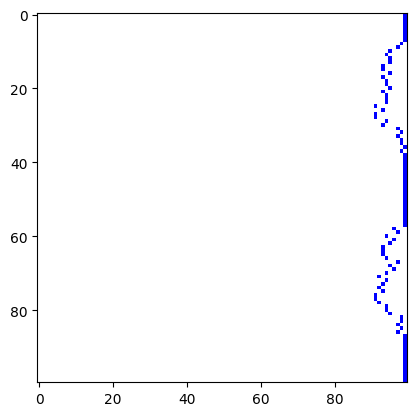

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


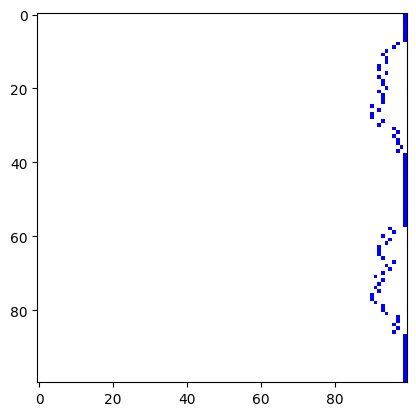

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


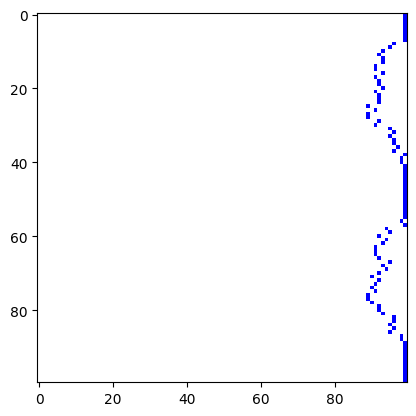

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


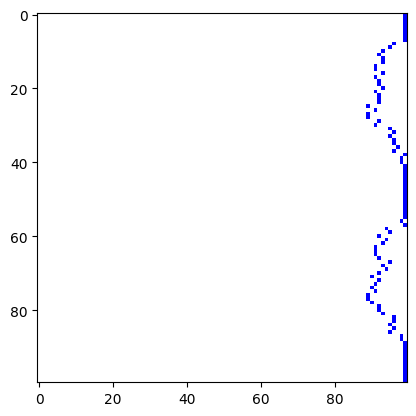

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


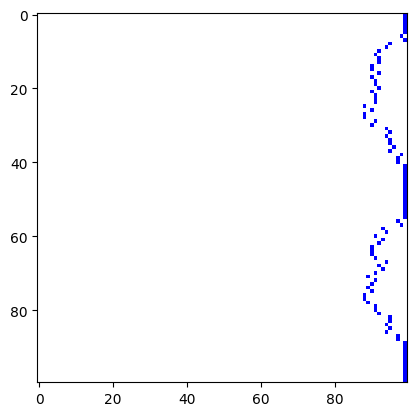

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


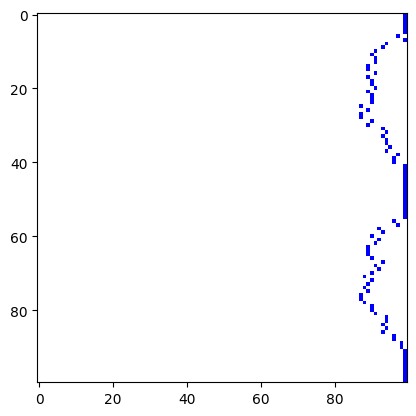

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


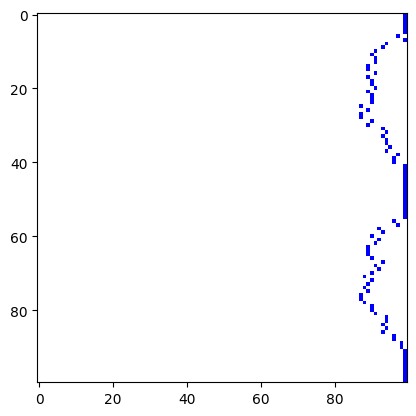

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


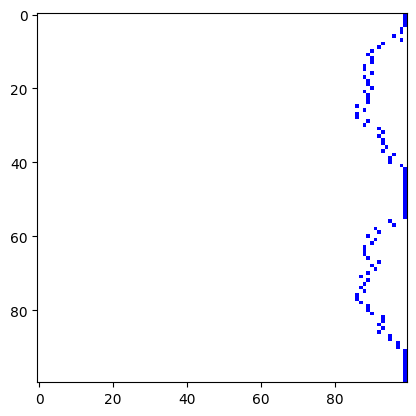

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


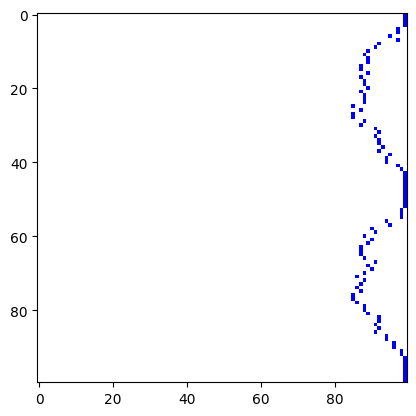

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


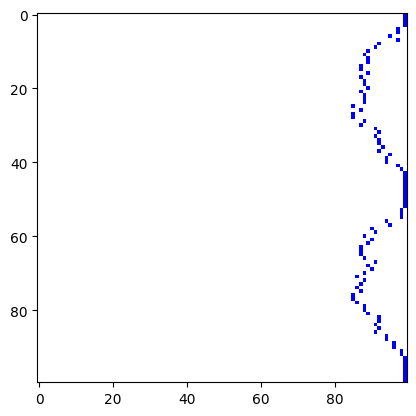

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


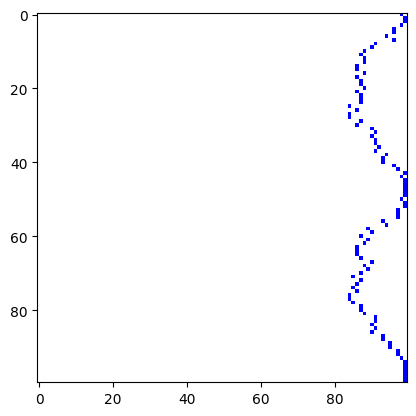

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


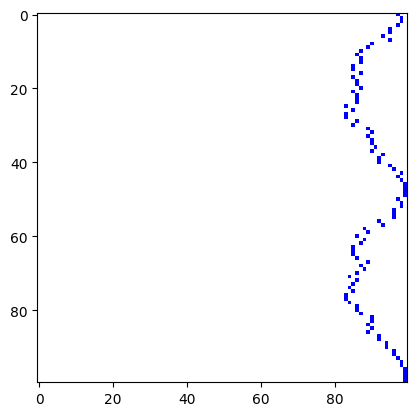

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


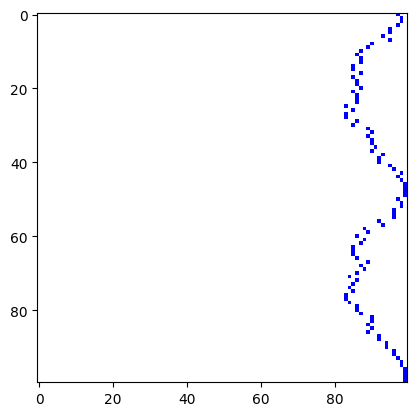

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


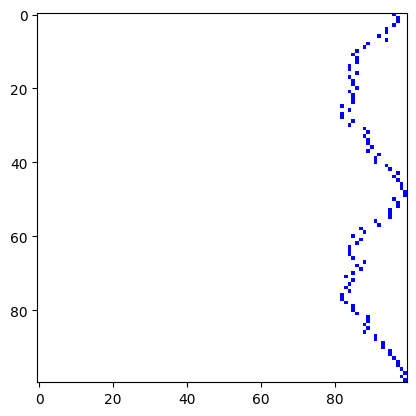

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


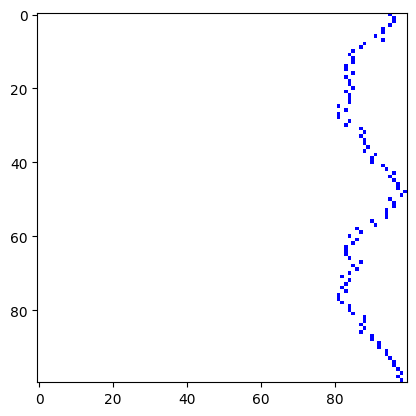

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


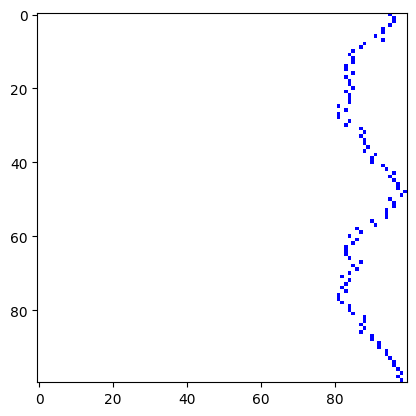

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


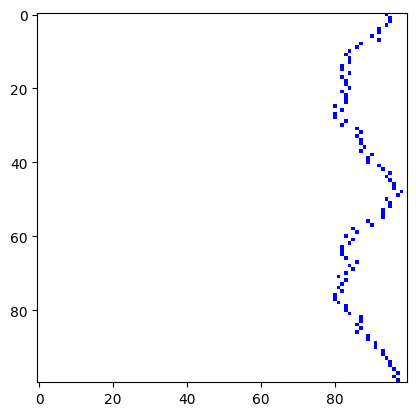

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


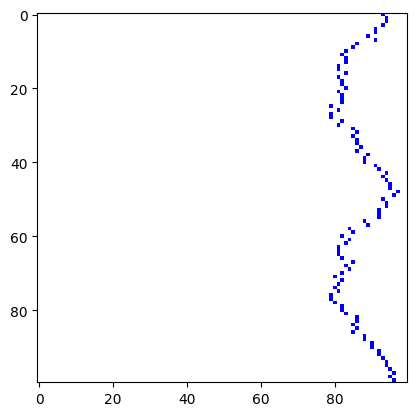

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


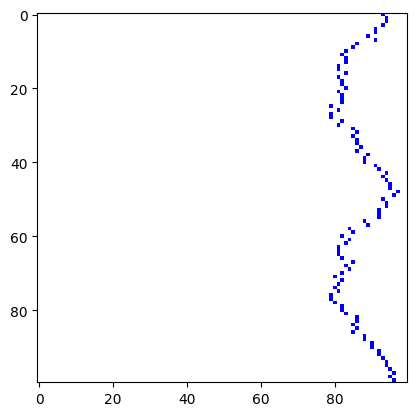

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


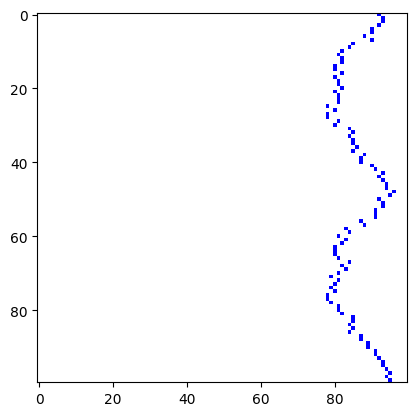

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


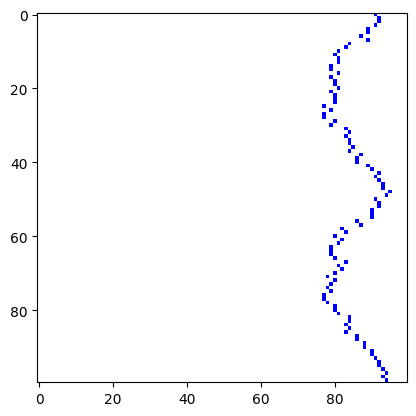

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


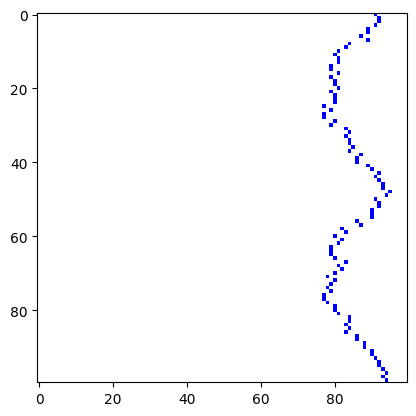

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


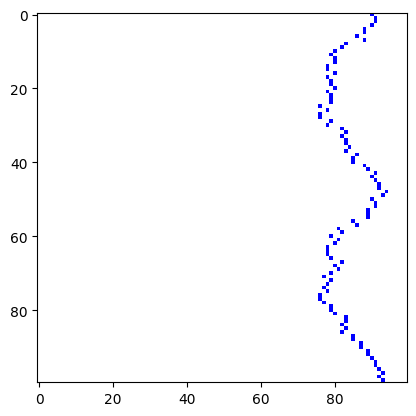

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


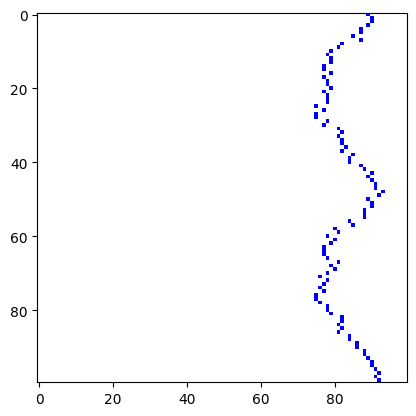

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


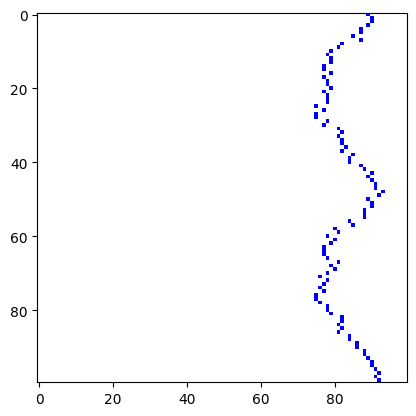

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


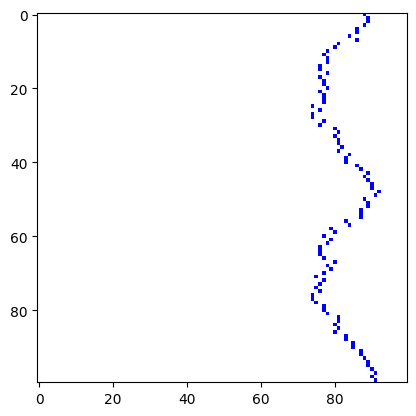

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


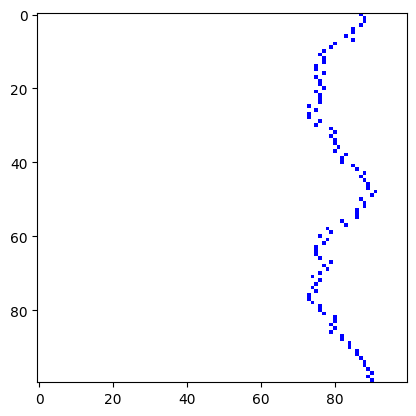

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


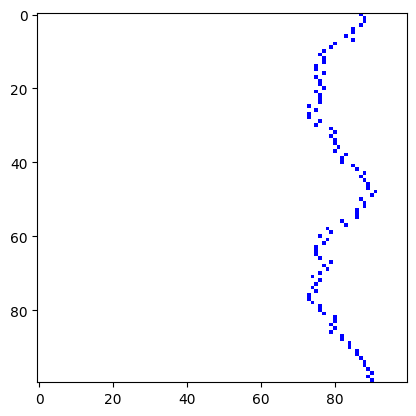

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


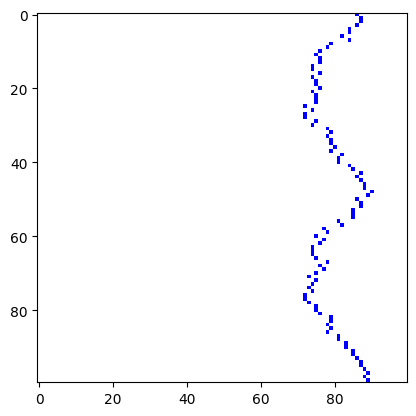

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


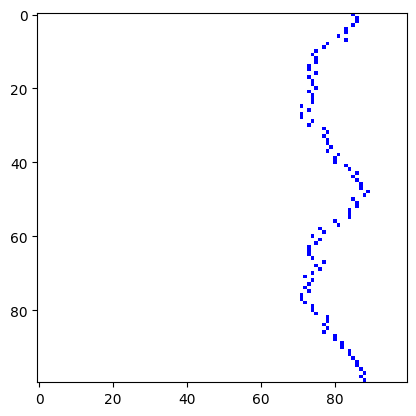

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


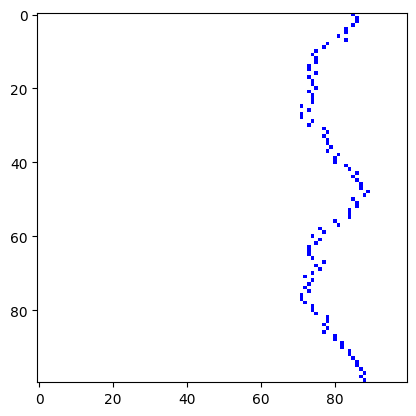

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


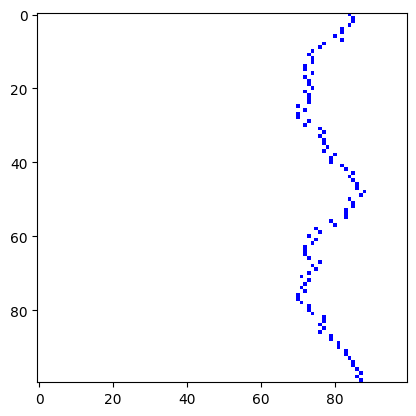

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


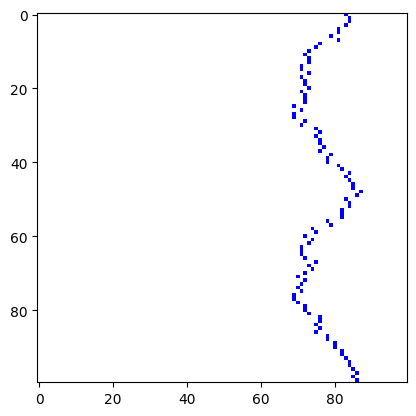

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


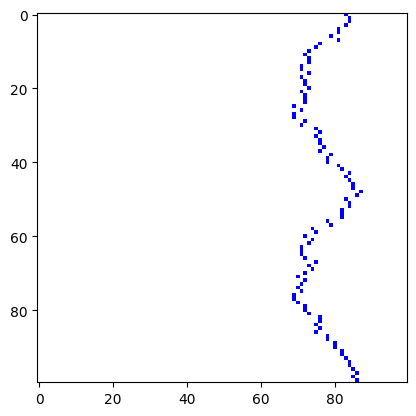

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


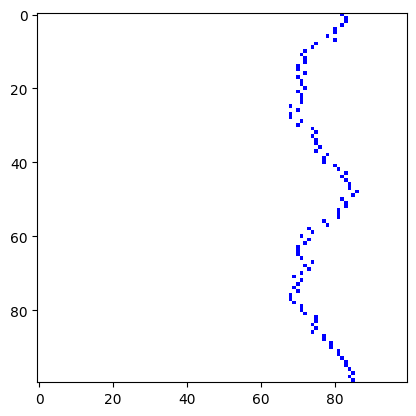

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


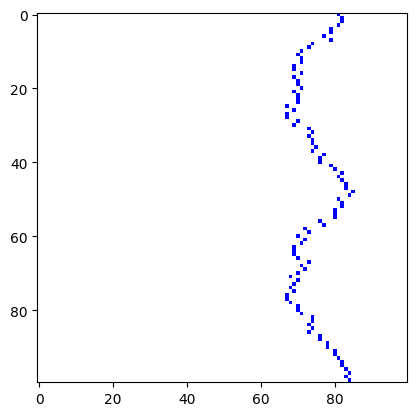

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


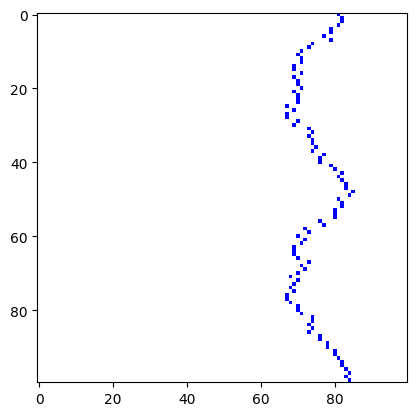

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


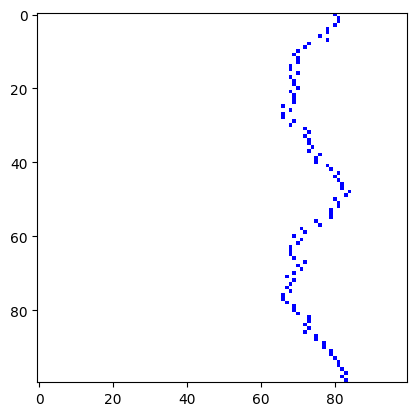

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


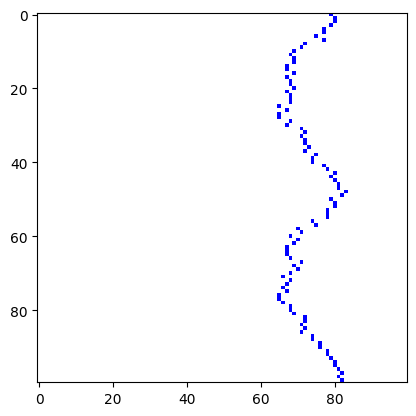

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


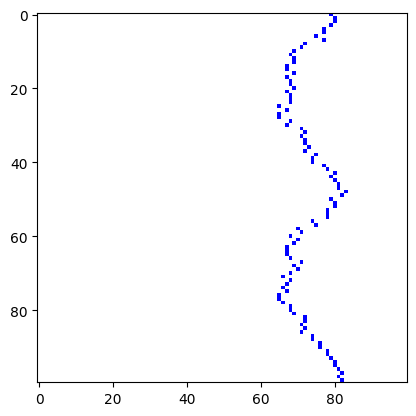

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


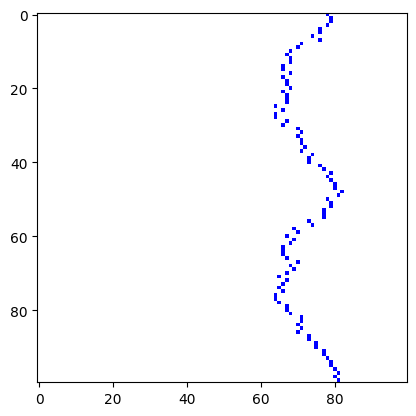

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


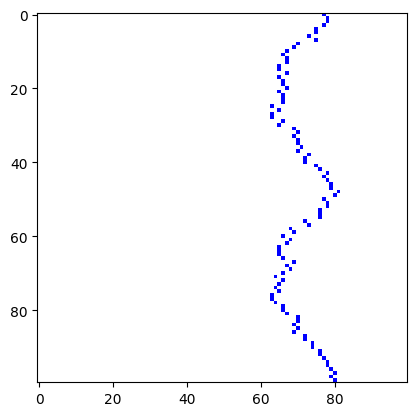

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


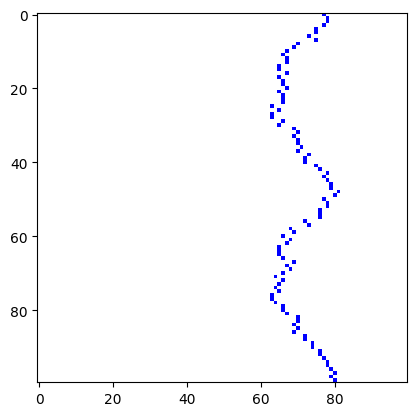

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


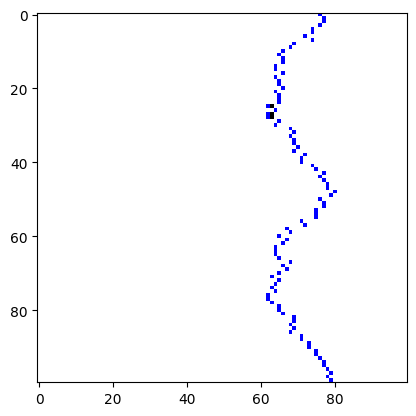

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


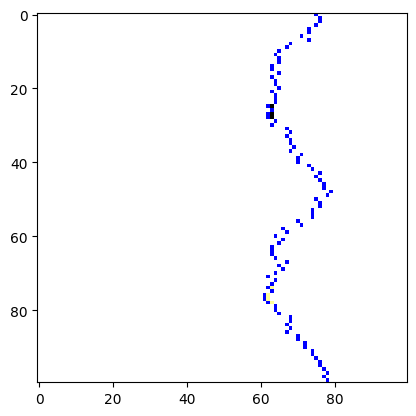

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


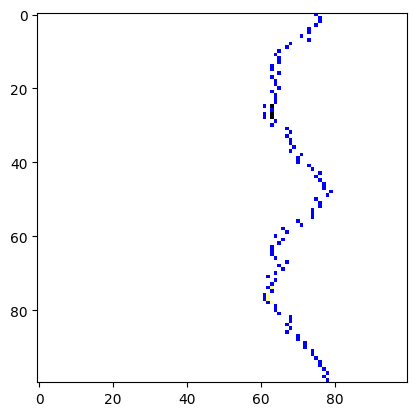

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


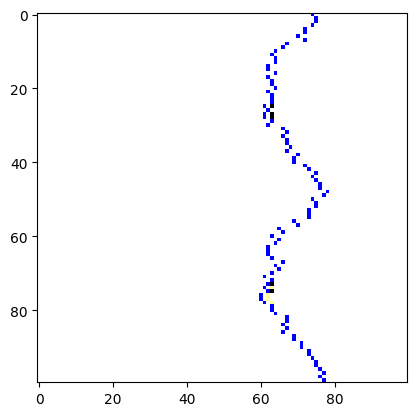

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


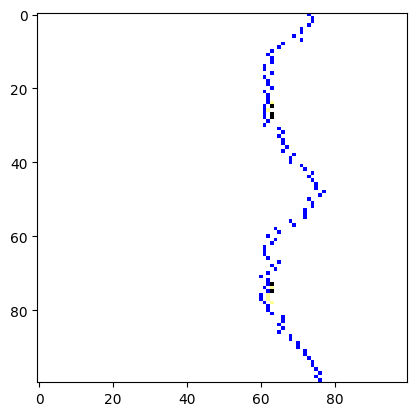

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


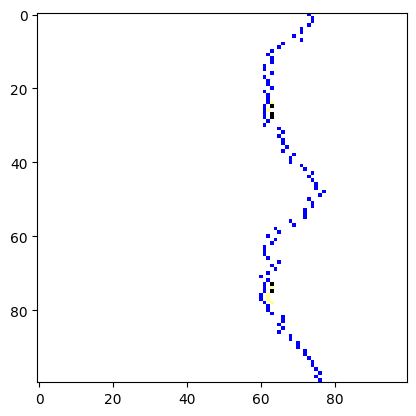

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


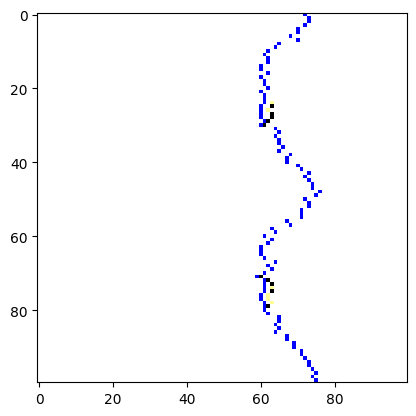

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


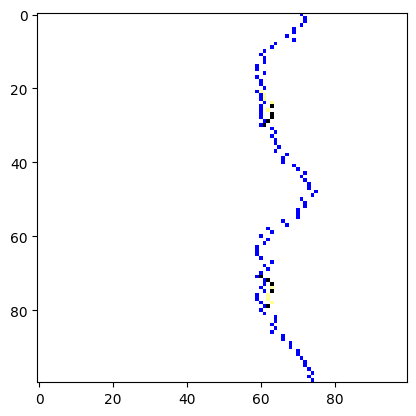

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


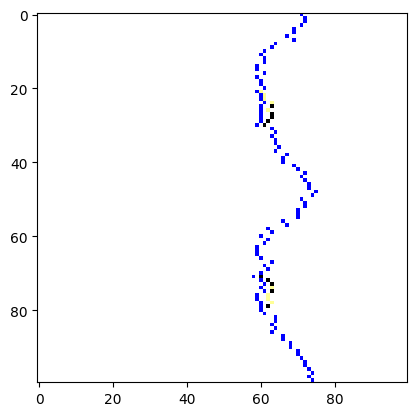

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


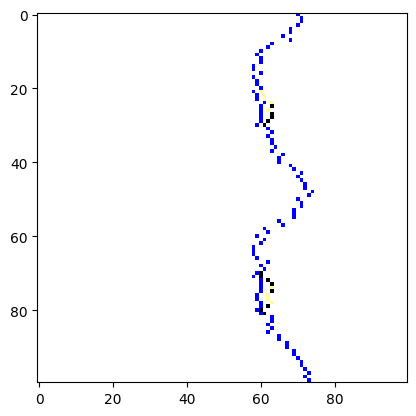

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


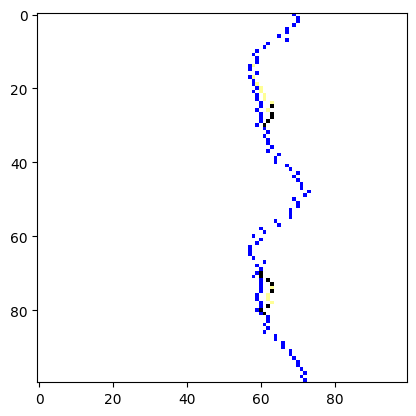

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


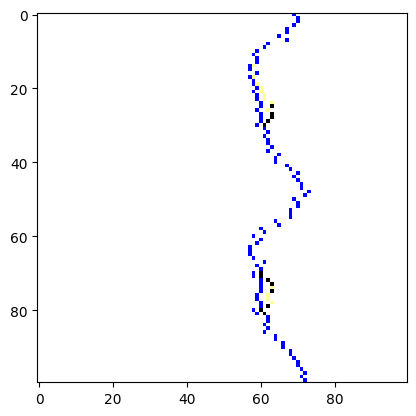

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


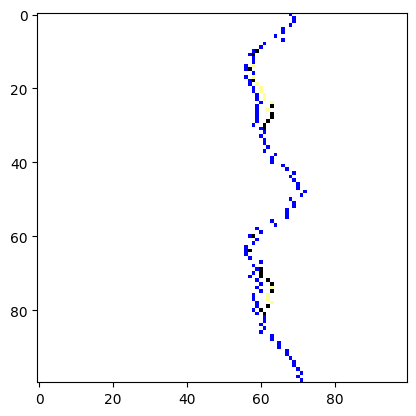

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


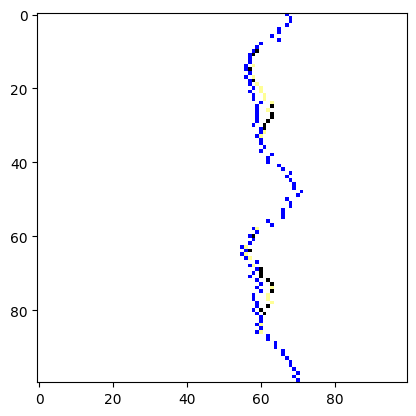

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


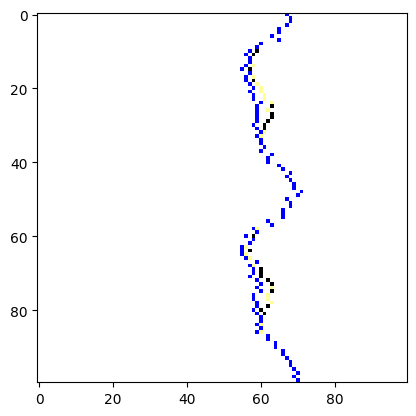

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


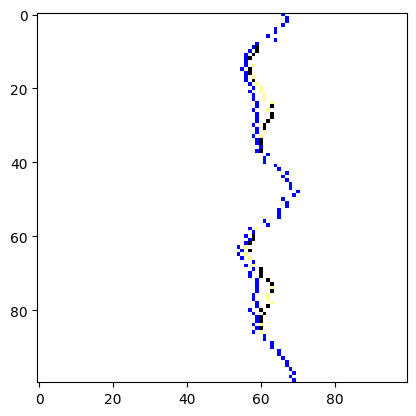

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


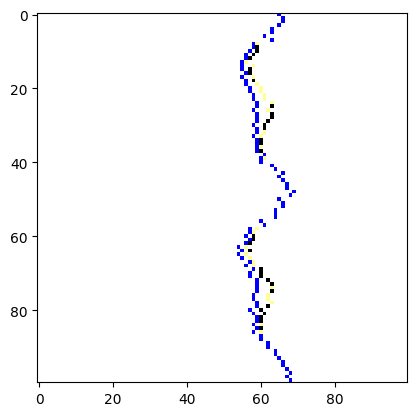

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


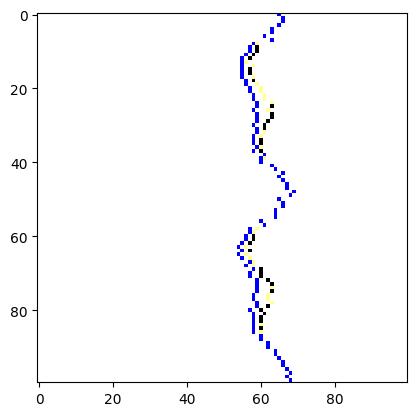

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


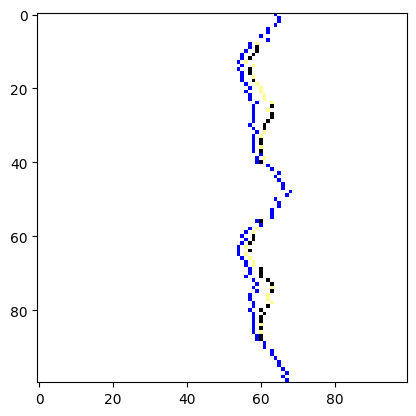

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


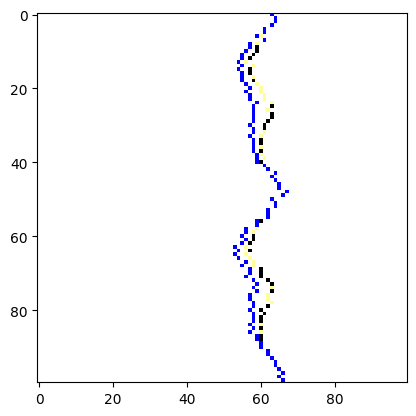

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


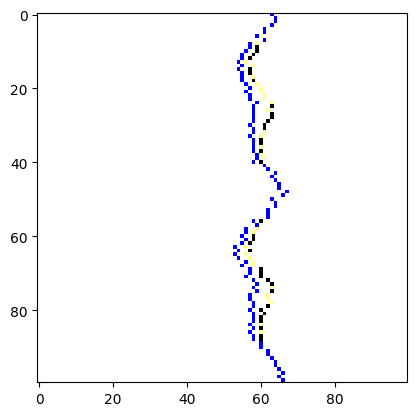

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


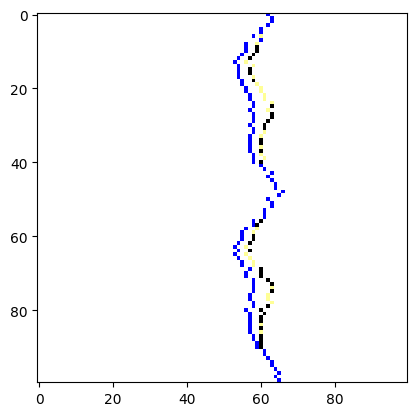

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


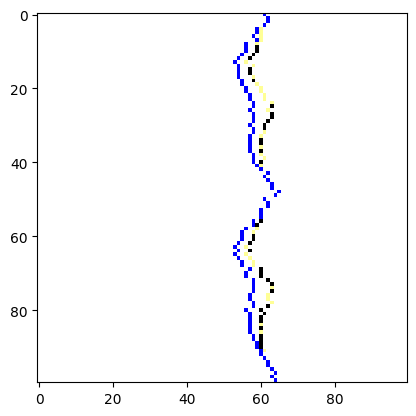

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


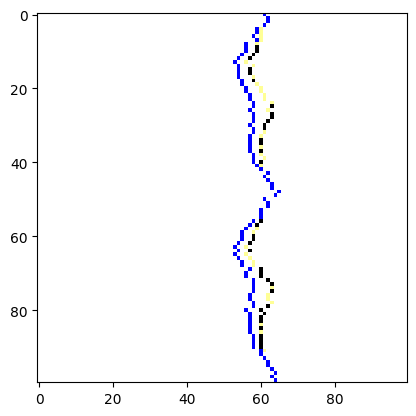

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


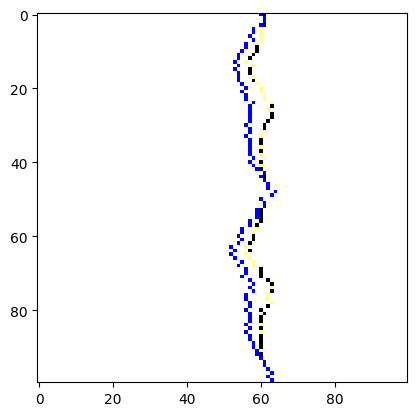

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


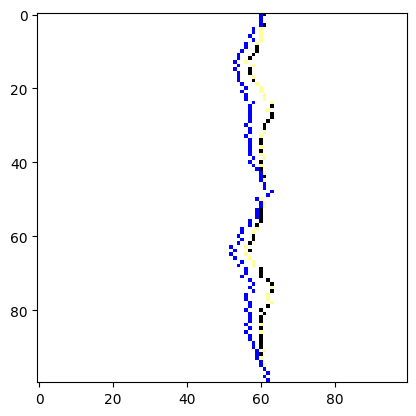

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


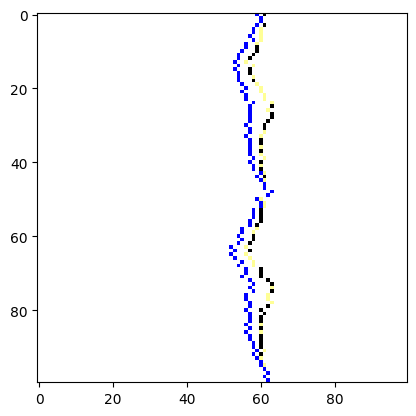

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


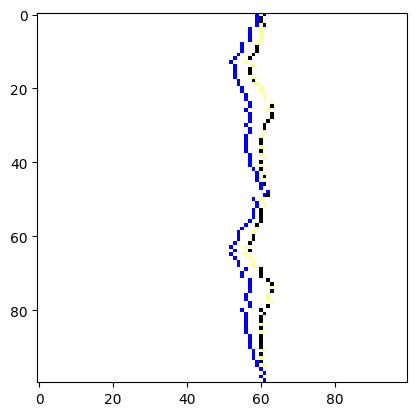

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


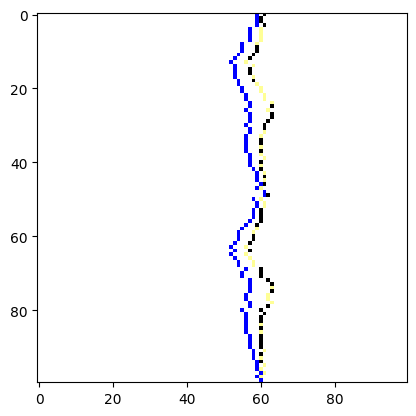

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


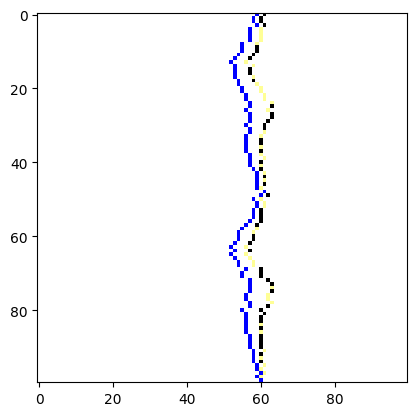

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


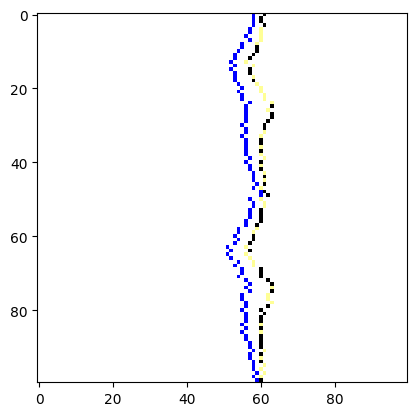

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


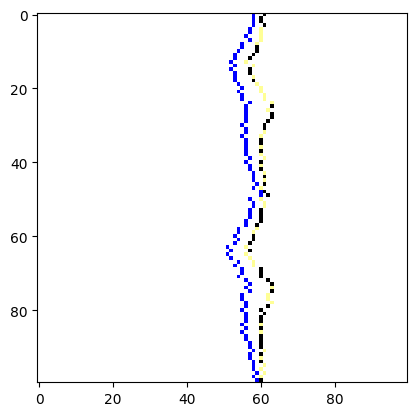

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


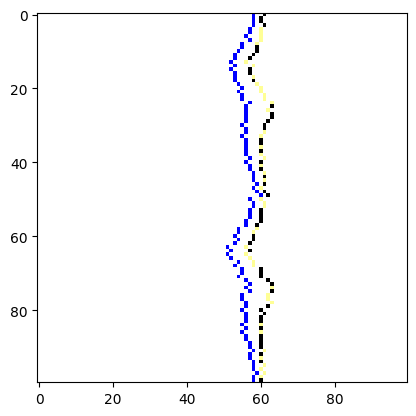

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


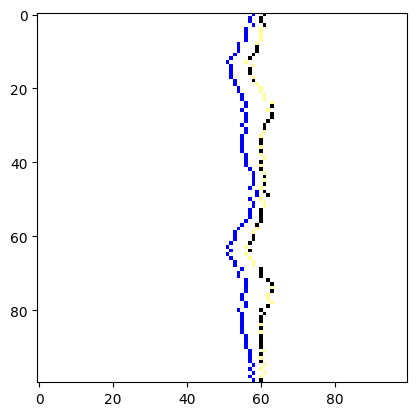

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


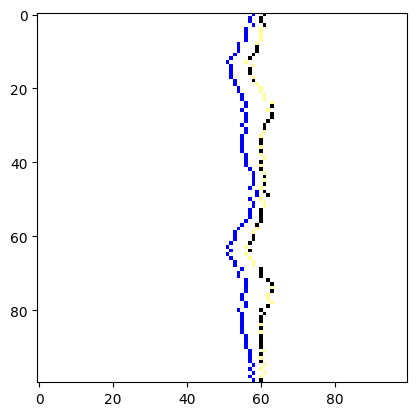

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


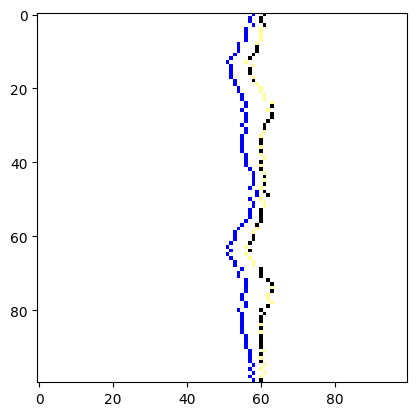

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


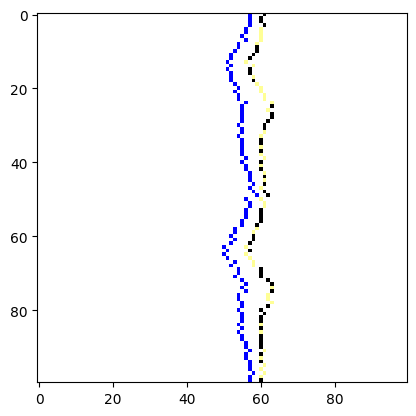

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


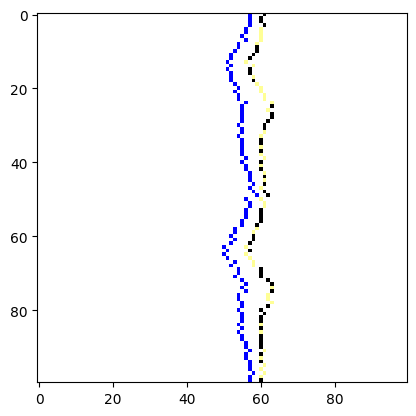

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


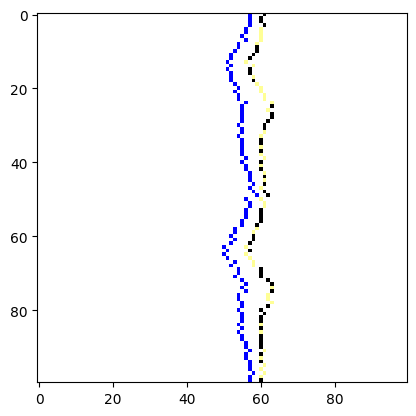

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


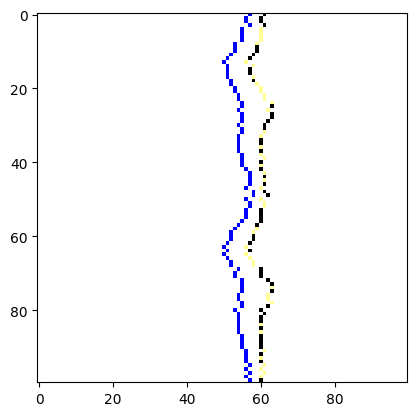

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


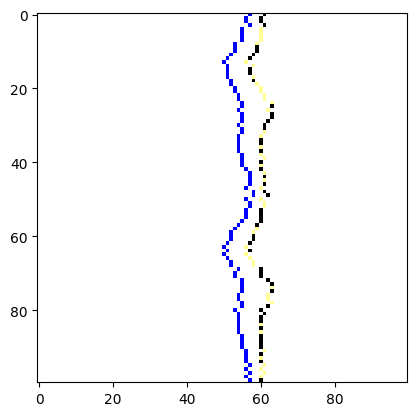

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


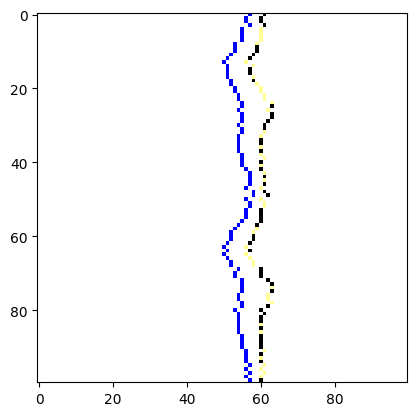

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


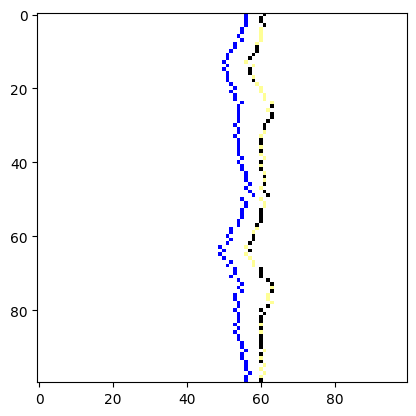

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..65025].


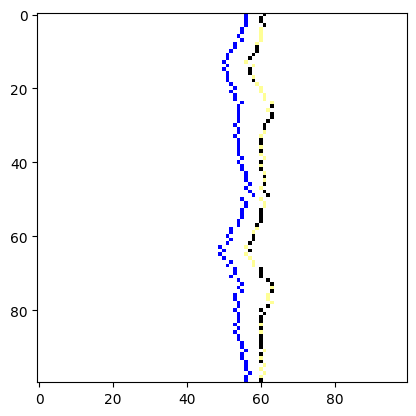

Total sand: 287616


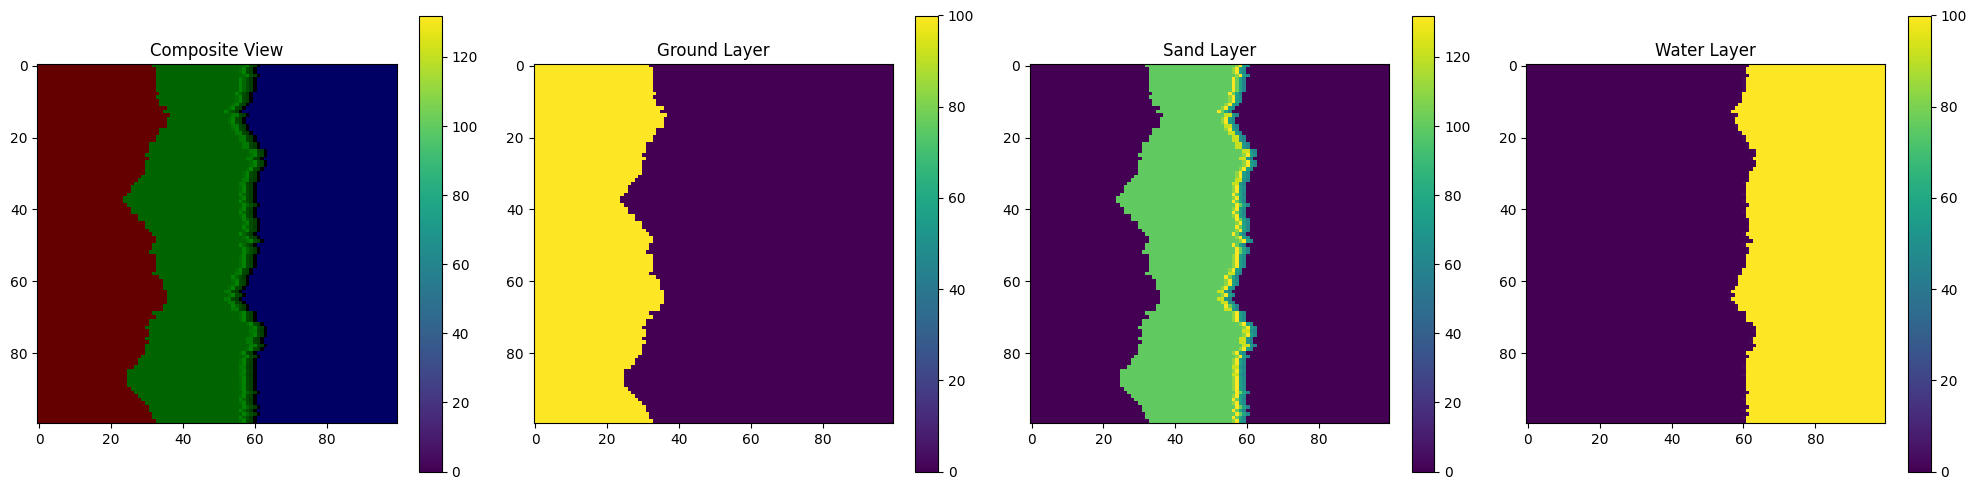


Demonstration completed!


In [5]:
# Run basic simulation
sim = run_basic_simulation()

# Run optimization
results = run_optimization(sim)

print("\nDemonstration completed!")